## Criação de uma inteligência que reconhece imagens (Deep Learning)
## Creation of a intelligence that image recognition (Deep Learning)

### Importando Bibliotecas
### Importing Libraries

In [1]:
#Importando bibliotecas da Rede Neural Artificial
#Importing libraries of Artificial Neural Network

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import *
from keras.utils import to_categorical
from keras.datasets import cifar10
from tensorflow import keras
from keras.layers import Activation, Dense, BatchNormalization, Dropout, Conv2D, LeakyReLU, Input, Flatten, ReLU
from keras.models import Model

### Importando os dados de um CIFAR10
### Importing dataset of CIFAR10

In [2]:
#Separando os dados em Treino e Teste
#Divide datasets in variables Train and Test
(x_treino, y_treino), (x_teste, y_teste) = cifar10.load_data()

#Número de categorias que possuímos no dataset
#Number of dataset classes
NUM_CLASSES = 10

### Visualizando os dados de CIFAR10
### Vizualization of CIFAR10 images dataset

In [3]:
#Exibindo a quantidade de imagens presentes na variável Treino e Teste
#Displaying the number of images that training and testing have

print(x_treino.shape)
print(y_treino.shape)
print(x_teste.shape)
print(y_teste.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
# Exibindo a quantidade de rótulos únicos que possuímos no conjunto de dados
# Displaying the number of labels that dataset have

print(np.unique(y_treino))
print(np.unique(y_teste))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [5]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

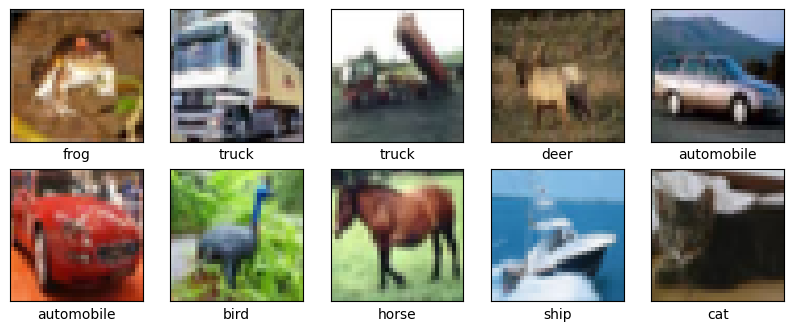

In [6]:
plt.figure(figsize=[10,10])
for i in range (10):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_treino[i], cmap=plt.cm.binary)
  plt.xlabel(CLASSES[y_treino[i][0]])

plt.show()

### Padronizando os dados
### Standardizing data of dataset

In [7]:
# Convertendo os dados para o format float32 
# Converting the dataset to the type float32 
x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

# Estabelecendo uma padronização dos dados
# Standardizing 255 pixels is the total number that an image can have
x_treino = x_treino / 255.0
x_teste = x_teste / 255.0

# Criando um one hot encoding nas classes alvo
# Creating one hot encodingo for target class
y_treino = to_categorical(y_treino, NUM_CLASSES)
y_teste = to_categorical(y_teste, NUM_CLASSES)

### Criando a Rede Neural Profunda
### Creating the Deep Neural Network

In [60]:
input_layer = Input((32, 32, 3))

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(rate = 0.5)

x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = ReLU()
x = Dropout(rate = 0.5)

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout( rate = 0.5)

x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dropout(rate = 0.5)(x)
x = Dense(NUM_CLASSES)(x)

output_layer = Activation('sigmoid')(x)
model = Model(input_layer, output_layer)

In [61]:
otimmizador = Adamax(learning_rate = 0.0010)
model.compile(loss = 'binary_crossentropy', optimizer = otimmizador, metrics = ['accuracy'])

In [70]:
model.fit(x_treino,
          y_treino,
          batch_size = 32,
          epochs = 20,
          shuffle = True,
          )

TypeError: Model.fit() got an unexpected keyword argument 'horizontal_flip'

In [63]:
model.evaluate(x_teste, y_teste)

313/313 [==============================] - 2s 5ms/step - loss: 0.1662 - accuracy: 0.6436


[0.16623666882514954, 0.6435999870300293]

In [64]:

preds = model.predict(x_teste)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_teste, axis = -1)]

313/313 [==============================] - 2s 5ms/step


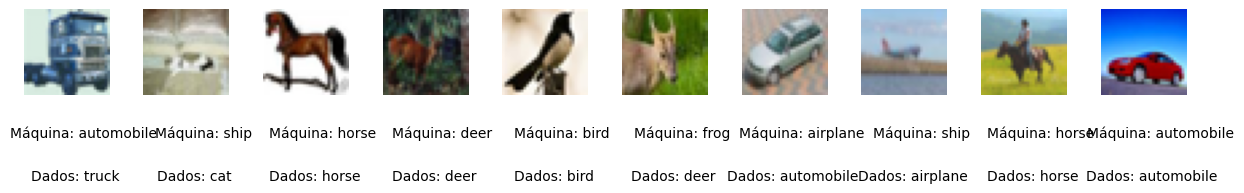

In [69]:
n_to_show = 10
indices = np.random.choice(range(len(x_teste)), n_to_show)

fig = plt.figure(figsize = (15, 3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, idx in enumerate(indices):
    img = x_teste[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.7, -0.5, 'Máquina: ' + str(preds_single[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
    ax.text(0.6, -1, 'Dados: ' + str(actual_single[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
    ax.imshow(img)